<a href="https://colab.research.google.com/github/Amansaini123/Final-Projects/blob/master/M9_Imdb_Sentiment_Analycis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Classification on the movie Reviews**


*   *Binary classification (POS OR NEG) on IMDB Dataset*
*   *Input is 50k reviews and output is pos or neg i.e output is binary*






In [72]:
# imdb is present inbuilt in the keras or we can download it otherwise
from keras.datasets import imdb

**Data Preprosessing **

In [73]:
# Loading the Train and the test data from the keras
# Here we are specifying how many unique words we want to keep example here 10K
# i.e most frequent 10K words will be kept in the dataset of mine

# Divding the data into train and test 
((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000)


In [74]:
print(XT[0])
print(YT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [75]:
print(len(Xt))
len(XT)

# We can see that total we have 50K reveiws which are equally divided between train and test

25000


25000

In [76]:
print(XT[0])

# This is a list of numbers which we have not expected 
# So What Keras do it that it convert Text into numbers 
# i.e each word is a sentence is assigned some number and then stored in the NLTK dictonary


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [77]:
# We can see the dictonary of word along with its correspoinding number 

word_idx=imdb.get_word_index()

In [81]:

# This is the corresponding number of the word stored in a key value pair
# dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007)
# this is the ouput of the above  """print(word_idx.items())""""

In [82]:
## If we want to see the actual Review we can reverse the dictonary and then see it

idx_word=dict([value,key] for (key,value) in word_idx.items())
# print(idx_word.items())
#dict_items([(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'),

In [41]:
# get is the method in which key is given as argument  and value is there for output
# But while storing words in the dictonary three words are  added after every key value pair , one is pad word <p> for padding 
# other is start of sentence<s> and other is <unk> i.e unmarked symbol , hence we specify with the -3


# If that particular index is not present in dict so type there ?
actual_review=' '.join([idx_word.get(idx-3,'?')for idx in XT[0]])
print(actual_review)




? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [42]:
 # By seeing the above review we can ensure that preprosessing such as stop word removal and stemming etc has been already done on the review
 # Hence this is the review we are going to vectorize as simply string cannot be passed to the neural network
 # And to maintain the continuity we will pass them as the vector
 # Since vocab size is 10K so we ensure that every vector is of the length 10K
 # Vector here is basically collection of 0 and 1 and of the size 10K
 # Hence this is how we can transfrom the data into fixed length values i.e by vectorization
 # We can do vectorization either by count vectorizer class or we can write our own method


 # So here we will make our own function

 import numpy as np
 
 def vectorize_sentences(sentences,dim=10000):
   # i.e we will have length of sen as rows and dim as column of our vector matrix
   outputs=np.zeros((len(sentences),dim))

   
   # Remember sentence is a list of numbers
   # enumerate will return two thing first is the index of the sentence and second is the actual number
   for i,idx in enumerate(sentences):
     outputs[i,idx]=1
    
   return outputs

In [43]:
X_train= vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

print(X_train.shape)
print(X_test.shape)



# Now we have 25K sentence each having 10k features 
# i.e now we have 25K vectors or a matrix

(25000, 10000)
(25000, 10000)


In [44]:
print(X_train[0])

# We can say that it is a vector of zero and ones

[0. 1. 1. ... 0. 0. 0.]


In [45]:
# Converting it to numpy array and the float array

Y_train=np.asarray(YT).astype('float32')
Y_test =np.asarray(Yt).astype('float32')


**Model architecture**



*   * 2 hidden layer with Relu activation function *
*   * 16 Neurons in 2 hidden layer and 1 neuron in output *
*   * Sigmoid activation in output layer and Relu in the hidden layer *



In [59]:
from keras import models
from keras.layers import Dense

Define the model

In [60]:
# Model is going to be the object of sequential class
model=models.Sequential()


# We will have Dense layer of 16 neurons with relu activation from a input_size of 10K
model.add(Dense(16,activation='relu',input_shape=(10000,)))

# This time we donot need to specify the input shape as model already known what are the inputs from Previous layers
model.add(Dense(16,activation='relu'))


# Defining the output layer 
model.add(Dense(1,activation='sigmoid'))



Compile the model

In [61]:
# Using optimizer to update the weight while backpropogation in the neural network and minimizing the loss
# There are various optimizer such as gradient descent ,stochastic gradient descent,adam ,rmsprop etc

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
model.summary()
# in the first layer we have 16*10K + 16 bias terms i.e 160016 parameters
# in the second layer we have 16*16 _16 bias term i.e 272
# We have 17 parameters in the last layer as 16 neurons and 1 bias term

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Traning and validation of the model

In [63]:
# We can see that model has more number of parameters (160,305) than number of examples in the training set i.e number of inputs(25k)
# Hence model might overfit,in order to avoid overfitting we need to have validation check (i.e out of 25k take 5k for validation check)
# Acccuracy of the model keep on increasing with the training  of 20k examples but it will not continously increase for 5K examples 
# i.e for 5K examples it will decrease after a particular threshold at that time we will stop training of our model i.e after a 
# particular threshold our model tries to overfit the examples

# This is a way to figure out what is the good number of iterations so that model does not overfit




# Selecting 20k examples in the traing set and 5k examples in the validation set

X_val=X_train[:5000]
X_train_new=X_train[5000:]

y_val=Y_train[:5000]
y_train_new=Y_train[5000:]


In [64]:

hist=model.fit(X_train_new,y_train_new,epochs=20,batch_size=512,validation_data=(X_val,y_val))



# It uses minibatch gradient descent hence we need to specify the batch size 
# batch_size is kept in the multiple of 2 so that it works with the GPU
# If we get the out of memory error with the large batch size we will have to start with smaller batch size

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 99us/step - loss: 0.5338 - accuracy: 0.7821 - val_loss: 0.4061 - val_accuracy: 0.8538
Epoch 2/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.3050 - accuracy: 0.9028 - val_loss: 0.2946 - val_accuracy: 0.8840
Epoch 3/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.2230 - accuracy: 0.9252 - val_loss: 0.3237 - val_accuracy: 0.8672
Epoch 4/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.1788 - accuracy: 0.9398 - val_loss: 0.2828 - val_accuracy: 0.8874
Epoch 5/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.1524 - accuracy: 0.9481 - val_loss: 0.2780 - val_accuracy: 0.8890
Epoch 6/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.1290 - accuracy: 0.9574 - val_loss: 0.2927 - val_accuracy: 0.8900
Epoch 7/20
20000/20000 [==============================] - 2s 86us/ste

In [65]:
# For each epoch it is taking 20 sec and accuary is increaing with every epoch 
# So after 20 iteration we are getting 99.7 accuary 


# Visulazing our data

import matplotlib.pyplot as plt
hist.history

# this gives output a dictonary which stores accuracy ,loss ,validation loss etc


{'accuracy': [0.78205,
  0.9028,
  0.92525,
  0.93975,
  0.9481,
  0.95735,
  0.9624,
  0.9696,
  0.9738,
  0.97875,
  0.983,
  0.9862,
  0.98855,
  0.9918,
  0.99325,
  0.9945,
  0.99585,
  0.99805,
  0.99785,
  0.9989],
 'loss': [0.5338253218650818,
  0.3049589813232422,
  0.2229537143230438,
  0.17882575263977052,
  0.15241222898960113,
  0.12897052824497224,
  0.11203278622627258,
  0.09595913627147674,
  0.082684148645401,
  0.06962641270160674,
  0.06017854308485985,
  0.049930892723798755,
  0.04206634905338287,
  0.03407814136147499,
  0.028074759072065355,
  0.024176777076721192,
  0.0192235254406929,
  0.013688486447930337,
  0.01211619902178645,
  0.00861802835110575],
 'val_accuracy': [0.8537999987602234,
  0.8840000033378601,
  0.8672000169754028,
  0.8873999714851379,
  0.8889999985694885,
  0.8899999856948853,
  0.8849999904632568,
  0.8855999708175659,
  0.875,
  0.8733999729156494,
  0.8826000094413757,
  0.8690000176429749,
  0.8661999702453613,
  0.8745999932289124,


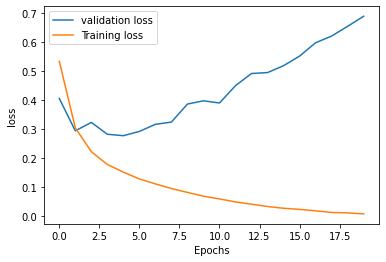

In [66]:
h=hist.history

plt.plot(h['val_loss'],label='validation loss')
plt.plot(h['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

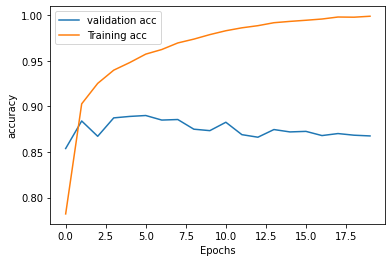

In [67]:
# Validation loss decreases upto few epoch and then it starts increasing

plt.plot(h['val_accuracy'],label='validation acc')
plt.plot(h['accuracy'],label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



# It is also seen that validation accuracy after a certain point will decrease
# We can notice that traing accuracy is about 100 percent(overfitting ) but the validation accuracy is around 88 percent
# Hence to avoid over fitting we will stop traning our model at 88 percent 

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 2s 85us/step - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.7241 - val_accuracy: 0.8684
Epoch 2/4
20000/20000 [==============================] - 2s 84us/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.7720 - val_accuracy: 0.8666
Epoch 3/4
20000/20000 [==============================] - 2s 84us/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.8183 - val_accuracy: 0.8642
Epoch 4/4
20000/20000 [==============================] - 2s 85us/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.8475 - val_accuracy: 0.8626


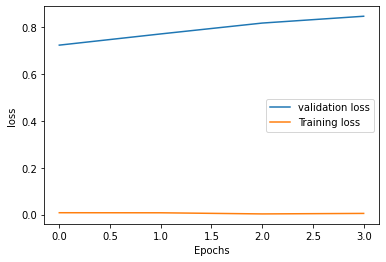

In [68]:
# Retraining our model with number of epochs as 4
hist=model.fit(X_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(X_val,y_val))




h=hist.history

plt.plot(h['val_loss'],label='validation loss')
plt.plot(h['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

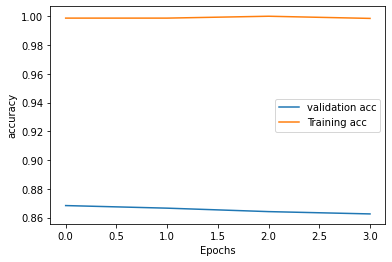

In [69]:
plt.plot(h['val_accuracy'],label='validation acc')
plt.plot(h['accuracy'],label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [58]:
model.evaluate?
# 2nd arugment gives the accuaracy hence [1]

model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 1s 46us/step


0.9728400111198425

In [70]:
model.predict(X_test)

array([[1.3937056e-03],
       [1.0000000e+00],
       [1.0787249e-03],
       ...,
       [5.4490596e-02],
       [9.8246336e-04],
       [9.8268819e-01]], dtype=float32)